In [11]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from string import punctuation 
nltk.download('stopwords')
from nltk.corpus import stopwords 
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning, message='`np.bool` is a deprecated alias')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 5.5 MB/s 


## (Q1) What is the sentiment associated with Tweets addressing the probability of recession in 2023 and how has this changed over time?

In [ ]:
start = "2022-01-01"
end   = "2022-12-31"
pd.date_range(start, end, freq='M')

str1 = [str(i)[:10] for i in pd.date_range(start, end, freq='MS')]
str2 = [str(i)[:10] for i in pd.date_range(start, end, freq='M')]

In [ ]:
word = 'recession 2023'

In [4]:
tweets = pd.read_csv('RecessionTweets.csv')

In [5]:
tweets = tweets.iloc[:,1:]
tweets.head()

,Datetime,Tweet Id,Text
0,2022-01-30 20:20:39+00:00,1.487883e+18,@ConvexityMaven Stagflation before end 2022 as...
1,2022-01-30 19:47:57+00:00,1.487875e+18,Next #Uranus cycle for #USA may have large im...
2,2022-01-30 18:28:21+00:00,1.487855e+18,"You joined them to shout ""change"" in 2015...\n..."
3,2022-01-30 17:54:46+00:00,1.487847e+18,@MarkKahn2 @mailboxmoney6 @MilwaukeeBonds I ap...
4,2022-01-30 15:42:47+00:00,1.487814e+18,@rico_fede 10-year yield is 1.78% right now. A...


## Clean data

In [12]:
_stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER','URL'])

def cleanTweets(text):
    if type(text) == np.float:
        return ""
    r = text.lower()
    r = re.sub("'", "", r)
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    r = [w for w in r if not w in _stopwords]
    r = " ".join(word for word in r)
    return r

def Get_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def Get_Polarity(text):
    return TextBlob(text).sentiment.polarity

def Scoring(df,bins,label,col):
    return pd.qcut(df[col],q=bins,labels=label)

In [13]:
tweets['cleanedTweets'] = tweets['Text'].apply(cleanTweets) 
tweets.head()

<ipython-input-12-dafb3609f86d>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(text) == np.float:


,Datetime,Tweet Id,Text,cleanedTweets
0,2022-01-30 20:20:39+00:00,1.487883e+18,@ConvexityMaven Stagflation before end 2022 as...,stagflation end 2022 call many months followed...
1,2022-01-30 19:47:57+00:00,1.487875e+18,Next #Uranus cycle for #USA may have large im...,next cycle may large impact civil unrest could...
2,2022-01-30 18:28:21+00:00,1.487855e+18,"You joined them to shout ""change"" in 2015...\n...",joined shout change 2015 got office gave croni...
3,2022-01-30 17:54:46+00:00,1.487847e+18,@MarkKahn2 @mailboxmoney6 @MilwaukeeBonds I ap...,appreciate thoughts barron article mirrors sug...
4,2022-01-30 15:42:47+00:00,1.487814e+18,@rico_fede 10-year yield is 1.78% right now. A...,10 year yield 1 78 right else equal ff rate go...


## Calculating the polarity and subjectivity of the cleaned tweet texts.
## Subjectivity shows the amount of personal opinion in a sentence. Its score lies between 0 and 1. If a tweet has high subjectivity i.e. close to 1, it means the tweet contains more of a personal opinion than factual information.
## The polarity score lies between (-1 to 1) where -1 identifies the most negative words and 1 identifies the most positive words

In [14]:
tweets['Subjectivity'] = tweets['cleanedTweets'].apply(Get_Subjectivity)
tweets['Polarity']     = tweets['cleanedTweets'].apply(Get_Polarity)

In [15]:
bin_labels = ['Strong','Neutral','Weak']
tweets['Sentiment'] = Scoring(tweets,3,bin_labels,'Polarity')

In [16]:
tweets['Sentiment'].value_counts()

Strong     24760
Weak       14223
Neutral     3763
Name: Sentiment, dtype: int64

In [17]:
tweets['Month'] = pd.DatetimeIndex(tweets['Datetime']).month

## We can see that there has been a strong sentiment with respect to recession during the financial year of 2022

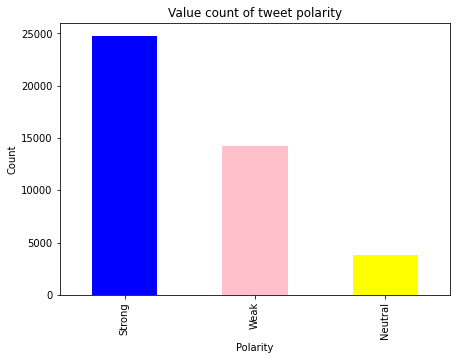

In [30]:
fig = plt.figure(figsize=(7,5))
color = ['blue','pink','yellow']
tweets['Sentiment'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

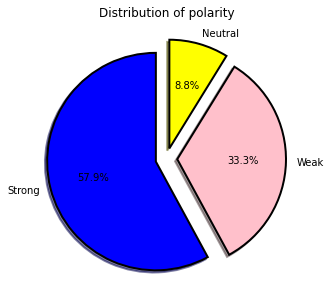

In [31]:
fig = plt.figure(figsize=(7,5))
colors = ('blue', 'pink', 'yellow')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=tweets['Sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

## It can also be seen that the sentiments have been becoming stronger with the course of time throughout the year 2022

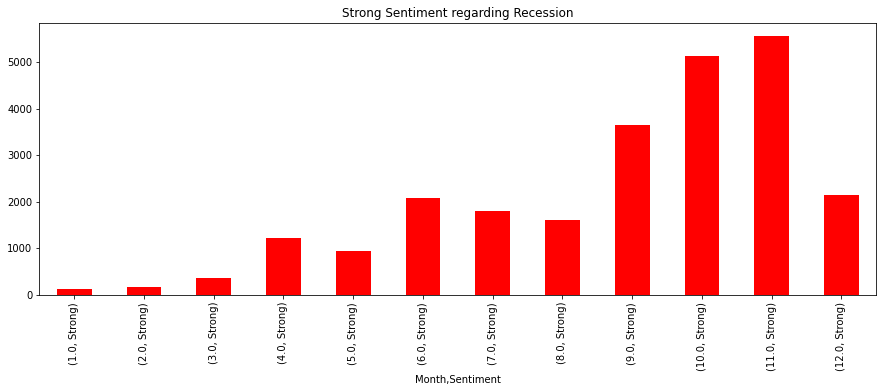

In [32]:
tweets[['Month','Sentiment']][tweets['Sentiment'] == "Strong"].value_counts().sort_index().plot(kind = 'bar',figsize= (15,5),title = "Strong Sentiment regarding Recession",color='red')

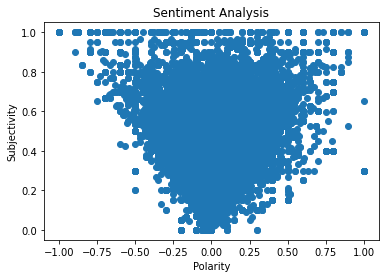

In [21]:
#plot the polarity and subjectivity on a scatter plot
plt.scatter(tweets['Polarity'],tweets['Subjectivity'])
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [33]:
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='black', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,7))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

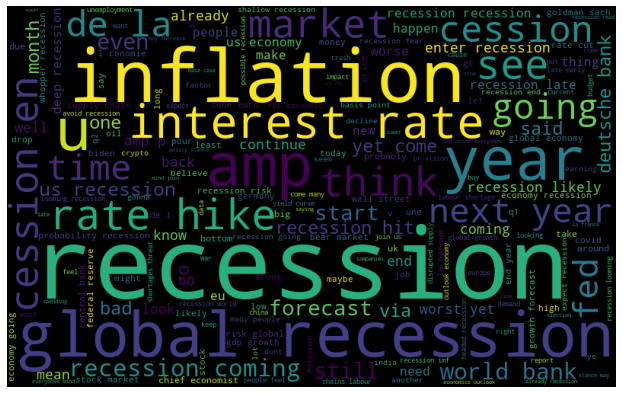

In [34]:
#wordcloud for positive tweets
posTweets = tweets.loc[tweets['Sentiment']=='Strong', 'cleanedTweets']
create_wordcloud(posTweets)

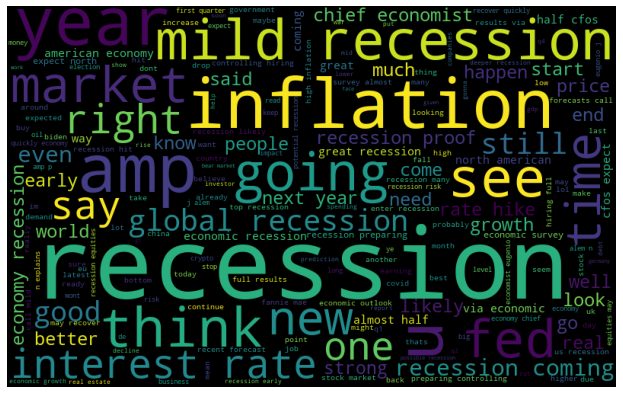

In [35]:
#wordcloud for negative tweets
negTweets = tweets.loc[tweets_to_df['Sentiment']=='Weak', 'cleanedTweets']
create_wordcloud(negTweets)

In [25]:
df = tweets_to_df

In [26]:
import string
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
df['punct'] = df['cleanedTweets'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
df['tokenized'] = df['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
df.head()

,Datetime,Tweet Id,Text,cleanedTweets,Subjectivity,Polarity,Sentiment,Month,punct,tokenized,nonstop,stemmed
0,2022-01-30 20:20:39+00:00,1.487883e+18,@ConvexityMaven Stagflation before end 2022 as...,stagflation end 2022 call many months followed...,0.750000,0.250000,Weak,1.0,stagflation end 222 call many months followed ...,"[stagflation, end, 222, call, many, months, fo...","[stagflation, end, 222, call, many, months, fo...","[stagflat, end, 222, call, mani, month, follow..."
1,2022-01-30 19:47:57+00:00,1.487875e+18,Next #Uranus cycle for #USA may have large im...,next cycle may large impact civil unrest could...,0.214286,0.107143,Weak,1.0,next cycle may large impact civil unrest could...,"[next, cycle, may, large, impact, civil, unres...","[next, cycle, may, large, impact, civil, unres...","[next, cycl, may, larg, impact, civil, unrest,..."
2,2022-01-30 18:28:21+00:00,1.487855e+18,"You joined them to shout ""change"" in 2015...\n...",joined shout change 2015 got office gave croni...,0.000000,0.000000,Strong,1.0,joined shout change 215 got office gave cronie...,"[joined, shout, change, 215, got, office, gave...","[joined, shout, change, 215, got, office, gave...","[join, shout, chang, 215, got, offic, gave, cr..."
3,2022-01-30 17:54:46+00:00,1.487847e+18,@MarkKahn2 @mailboxmoney6 @MilwaukeeBonds I ap...,appreciate thoughts barron article mirrors sug...,0.000000,0.000000,Strong,1.0,appreciate thoughts barron article mirrors sug...,"[appreciate, thoughts, barron, article, mirror...","[appreciate, thoughts, barron, article, mirror...","[appreci, thought, barron, articl, mirror, sug..."
4,2022-01-30 15:42:47+00:00,1.487814e+18,@rico_fede 10-year yield is 1.78% right now. A...,10 year yield 1 78 right else equal ff rate go...,0.296429,0.096429,Weak,1.0,1 year yield 1 78 right else equal ff rate goi...,"[1, year, yield, 1, 78, right, else, equal, ff...","[1, year, yield, 1, 78, right, else, equal, ff...","[1, year, yield, 1, 78, right, els, equal, ff,..."


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['cleanedTweets'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df

42746 Number of tweets has 23741 words


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aa,aaa,aaaaaad,aaaaaand,aaaaghhhh,aaahhh,aaaiy,aac,aadhi,...,zuck,zuckerberg,zukunft,zulauf,zuma,zumarraga,zur,zvichadhakwisisa,zweig,zweitniedrigst
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42741,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42742,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42743,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42744,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df['cleanedTweets'],(2,2),20)
n2_bigrams

[('recession 2023', 10049),
 ('2023 recession', 3773),
 ('global recession', 2044),
 ('en 2023', 1615),
 ('2022 2023', 1182),
 ('recession coming', 1012),
 ('early 2023', 962),
 ('rate hikes', 953),
 ('half 2023', 953),
 ('mild recession', 885),
 ('2023 2024', 856),
 ('end 2023', 804),
 ('cession en', 761),
 ('mid 2023', 732),
 ('une cession', 729),
 ('coming 2023', 726),
 ('late 2023', 703),
 ('economy recession', 687),
 ('recession likely', 674),
 ('like recession', 630)]

In [29]:
n3_trigrams = get_top_n_gram(df['cleanedTweets'],(3,3),20)
n3_trigrams

[('global recession 2023', 819),
 ('cession en 2023', 637),
 ('feel like recession', 534),
 ('recession coming 2023', 531),
 ('2023 feel like', 496),
 ('mild recession 2023', 458),
 ('economy recession 2023', 406),
 ('chief economist eugenio', 318),
 ('economist eugenio alem', 318),
 ('risk global recession', 293),
 ('recession late 2023', 291),
 ('whopper recession 2023', 290),
 ('occur half 2023', 284),
 ('recession occur half', 281),
 ('half 2023 survey', 276),
 ('cfos responding survey', 270),
 ('survey recession occur', 270),
 ('american economy recession', 270),
 ('according majority 68', 269),
 ('majority 68 cfos', 269)]

## The most popular trigrams of the tweets corpus suggests a forecast about the nature of the recession in 2023, since the recession took off severly in the late months of 2022 and is hence suggestive of a more serious recession during 2023.
## The trigrams that suggest them are: ('global recession 2023', 819), ('recession late 2023', 291), ('half 2023 survey', 276), ('mild recession 2023', 458), ('recession coming 2023', 531)